# Data Loading and Initial Exploration

In [7]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Thesisdataset.csv', parse_dates=['UTC'], date_format='%Y-%m-%d %H:%M:%S%z')

# Set 'UTC' column as the index
df.set_index('UTC', inplace=True)

# Display the first and last few rows of the DataFrame
print(df.head())
print(df.tail())

# Get a summary of the DataFrame
df.info()

                                 pID            Prd   PrdNorm         Irr
UTC                                                                      
2023-04-13 11:00:00+00:00  Bisceglie  780930.530000  0.791461  917.055833
2023-04-13 12:00:00+00:00  Bisceglie  743441.672500  0.753484  872.392333
2023-04-13 13:00:00+00:00  Bisceglie  578979.020833  0.586780  670.299333
2023-04-13 14:00:00+00:00  Bisceglie  415189.573333  0.420821  478.413500
2023-04-13 15:00:00+00:00  Bisceglie  530802.923333  0.537957  605.063667
                             pID         Prd  PrdNorm       Irr
UTC                                                            
2024-06-19 19:00:00+00:00  Celso  27114.7325  0.00452  5.538500
2024-06-19 20:00:00+00:00  Celso      0.0000  0.00000  0.338333
2024-06-19 21:00:00+00:00  Celso      0.0000  0.00000  0.320833
2024-06-19 22:00:00+00:00  Celso      0.0000  0.00000  0.307000
2024-06-19 23:00:00+00:00  Celso      0.0000  0.00000  0.294500
<class 'pandas.core.frame.DataFram

# DataFrame Summary

In [8]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56007 entries, 2023-04-13 11:00:00+00:00 to 2024-06-19 23:00:00+00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pID      56007 non-null  object 
 1   Prd      56007 non-null  float64
 2   PrdNorm  56007 non-null  float64
 3   Irr      56007 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.1+ MB


# Handling Missing Values

In [9]:

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values for numeric columns
numeric_columns = ['Prd', 'PrdNorm', 'Irr']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify there are no more missing values
print(df.isnull().sum())

pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64
pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64


# Verifying and Correcting Data Types

In [10]:
# Verify data types
print(df.dtypes)

# Ensure all data types are as expected, for example, prd and Irr should be float
df['Prd'] = df['Prd'].astype(float)
df['Irr'] = df['Irr'].astype(float)
df['PrdNorm'] = df['PrdNorm'].astype(float)

# Verify the changes
print(df.dtypes)


pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object
pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object


# Verifying Normalization

In [11]:
# Verify the normalization
print(df['PrdNorm'].describe())

count    56007.000000
mean         0.162691
std          0.245157
min          0.000000
25%          0.000000
50%          0.000486
75%          0.290100
max          0.898216
Name: PrdNorm, dtype: float64


# Resampling Data to Daily Frequency
## Purpose
This code resamples the data to a daily frequency by summing the values for each day. This is particularly useful when working with time series data where daily aggregation of variables like production and irradiation is needed.

- **Resampling**: The `resample('D')` method is used to group the data by day, and the `sum()` function aggregates the values for each day.
- **Verification**: The first few rows of the resampled DataFrame are displayed to confirm the daily aggregation.

In [12]:
# Resample the data to daily production and irradiation
daily_df = df.resample('D').sum()

# Display the first few rows of the resampled DataFrame
print(daily_df.head())


                                                                         pID  \
UTC                                                                            
2023-04-13 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-14 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-15 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-16 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-17 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   

                                    Prd   PrdNorm          Irr  
UTC                                                             
2023-04-13 00:00:00+00:00  2.000873e+07  7.483768  8745.116870  
2023-04-14 00:00:00+00:00  2.737290e+07  6.198623  7305.307037  
2023-04-15 00:00:00+00:00  2.239684e+07  8.372315  9376.017170  
2023-04-16 00:00:00+00:00  1.527575e+07  6.041580  6571.661265  
2023-04-17 00:00:00+00:00  1.045721e+07  3.385164

# Generating Descriptive Statistics

In [13]:
# Generate descriptive statistics
daily_stats = daily_df.describe()
print(daily_stats)


                Prd     PrdNorm           Irr
count  4.340000e+02  434.000000    434.000000
mean   6.049409e+07   20.995030  25190.618963
std    3.167005e+07    9.611651  11863.851007
min    0.000000e+00    0.000000      0.000000
25%    3.726667e+07   12.985842  15604.705024
50%    5.625551e+07   20.953532  24682.439795
75%    7.993752e+07   27.567742  32963.240674
max    1.696259e+08   50.245950  61883.108917


# Importing Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Univariate Analysis

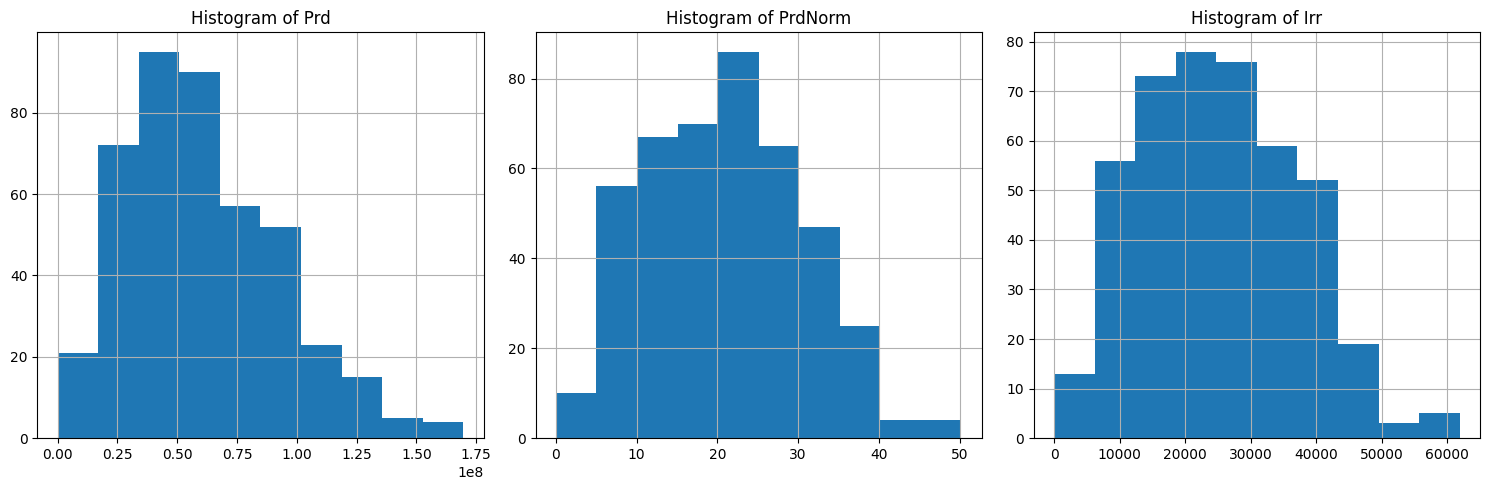

In [15]:
# Univariate Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
daily_df['Prd'].hist(ax=axes[0])
axes[0].set_title('Histogram of Prd')
daily_df['PrdNorm'].hist(ax=axes[1])
axes[1].set_title('Histogram of PrdNorm')
daily_df['Irr'].hist(ax=axes[2])
axes[2].set_title('Histogram of Irr')
plt.tight_layout()
plt.show()

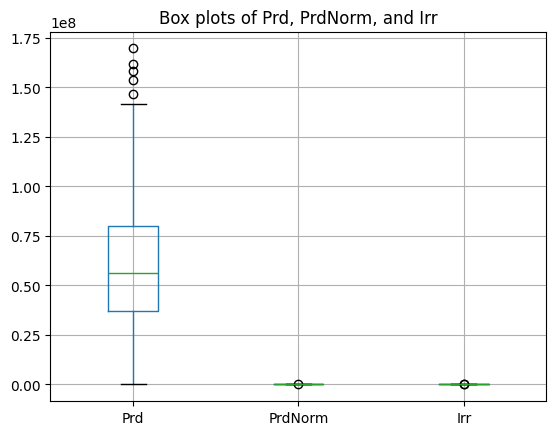

In [16]:
daily_df.boxplot(column=['Prd', 'PrdNorm', 'Irr'])
plt.title('Box plots of Prd, PrdNorm, and Irr')
plt.show()

# Bivariate Analysis

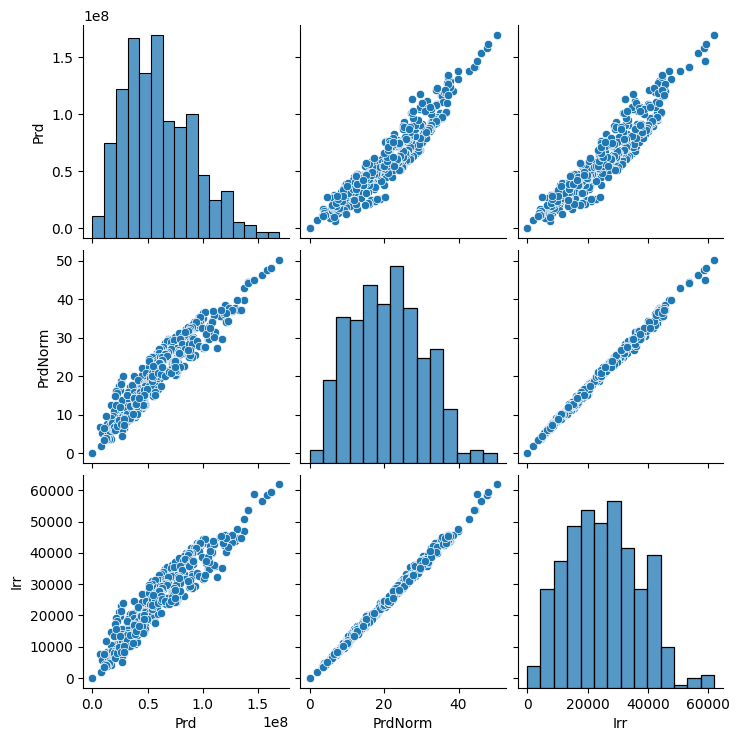

In [17]:
# Bivariate Analysis
sns.pairplot(daily_df[['Prd', 'PrdNorm', 'Irr']])
plt.show()

# Correlation Matrix

This code computes and visualizes the correlation matrix for the variables `'Prd'`, `'PrdNorm'`, and `'Irr'`. The correlation matrix provides insights into the linear relationships between these variables.

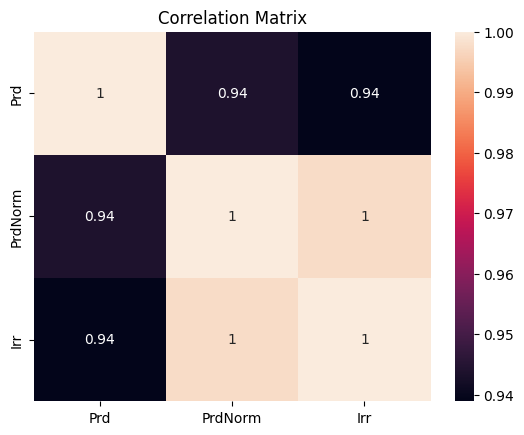

In [18]:
# Correlation Matrix
corr_matrix = daily_df[['Prd', 'PrdNorm', 'Irr']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis

This code performs a time series analysis by plotting the variables `'Prd'`, `'PrdNorm'`, and `'Irr'` for a specific date (`'2024-02-17'`). The visualization helps to understand how these variables change over time on that particular day.

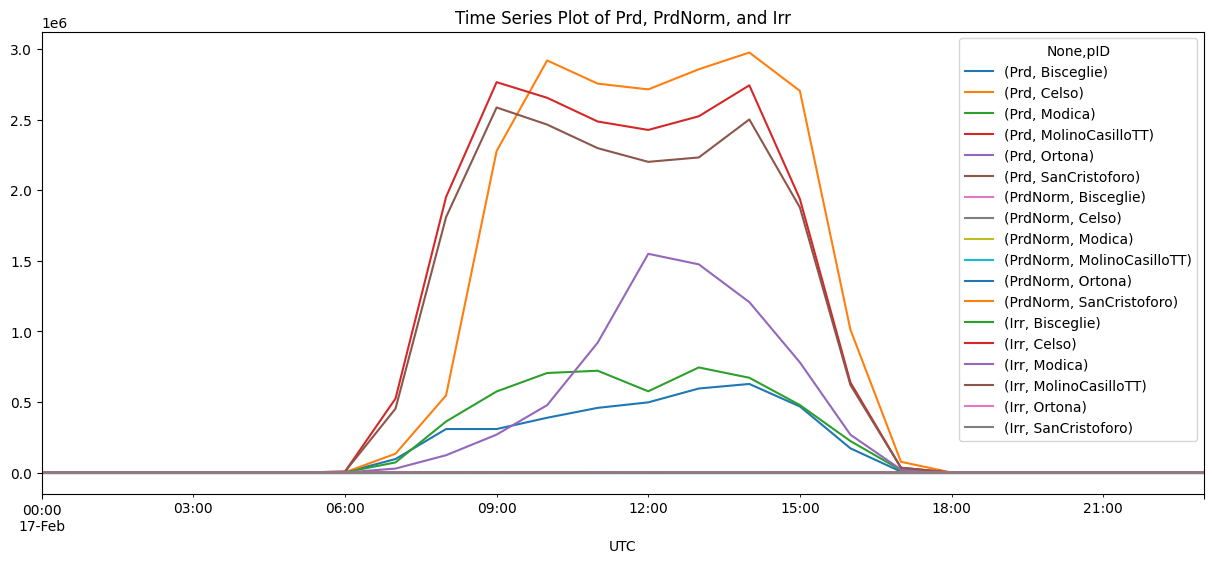

In [19]:
# Time Series Analysis
df.set_index('pID', append=True).unstack(level=1).sort_index().loc['2024-02-17'][['Prd', 'PrdNorm', 'Irr']].plot(figsize=(15, 6))

plt.title('Time Series Plot of Prd, PrdNorm, and Irr')
plt.show()


# Reshaping Data for Time Series Analysis

This code reshapes the DataFrame by setting an additional index (`'pID'`) and unstacking the data. This transformation prepares the DataFrame for time series analysis by organizing the data in a way that facilitates easier plotting and analysis of multiple variables.

In [20]:
df.set_index('pID', append=True).unstack(level=1)

Prd                                       \
pID                            Bisceglie       Celso   Modica MolinoCasilloTT   
UTC                                                                             
2023-04-13 11:00:00+00:00  780930.530000         NaN      NaN    3.167157e+06   
2023-04-13 12:00:00+00:00  743441.672500         NaN      NaN    3.112100e+06   
2023-04-13 13:00:00+00:00  578979.020833         NaN      NaN    3.126391e+06   
2023-04-13 14:00:00+00:00  415189.573333         NaN      NaN    2.061898e+06   
2023-04-13 15:00:00+00:00  530802.923333         NaN      NaN    2.355887e+06   
...                                  ...         ...      ...             ...   
2024-06-19 19:00:00+00:00    2787.246667  27114.7325  1416.39    1.169771e+04   
2024-06-19 20:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 21:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 22:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 23:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   

                                                        PrdNorm           \
pID                              Ortona SanCristoforo Bisceglie    Celso   
UTC                                                                        
2023-04-13 11:00:00+00:00      0.000000           NaN  0.791461      NaN   
2023-04-13 12:00:00+00:00      0.000000           NaN  0.753484      NaN   
2023-04-13 13:00:00+00:00      0.000000           NaN  0.586780      NaN   
2023-04-13 14:00:00+00:00      0.000000           NaN  0.420821      NaN   
2023-04-13 15:00:00+00:00      0.000000           NaN  0.537957      NaN   
...                                 ...           ...       ...      ...   
2024-06-19 19:00:00+00:00  13733.264167  15361.586667  0.002817  0.00452   
2024-06-19 20:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 21:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 22:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 23:00:00+00:00      0.000000      0.000000  0.000000  0.00000   

                                                                             \
pID                          Modica MolinoCasilloTT    Ortona SanCristoforo   
UTC                                                                           
2023-04-13 11:00:00+00:00       NaN        0.712887  0.000000           NaN   
2023-04-13 12:00:00+00:00       NaN        0.700477  0.000000           NaN   
2023-04-13 13:00:00+00:00       NaN        0.703715  0.000000           NaN   
2023-04-13 14:00:00+00:00       NaN        0.464113  0.000000           NaN   
2023-04-13 15:00:00+00:00       NaN        0.530251  0.000000           NaN   
...                             ...             ...       ...           ...   
2024-06-19 19:00:00+00:00  0.001419        0.002632  0.006091      0.003179   
2024-06-19 20:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 21:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 22:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 23:00:00+00:00  0.000000        0.000000  0.000000      0.000000   

                                  Irr                                      \
pID                         Bisceglie     Celso    Modica MolinoCasilloTT   
UTC                                                                         
2023-04-13 11:00:00+00:00  917.055833       NaN       NaN      809.252296   
2023-04-13 12:00:00+00:00  872.392333       NaN       NaN      798.701926   
2023-04-13 13:00:00+00:00  670.299333       NaN       NaN      821.734370   
2023-04-13 14:00:00+00:00  478.413500       NaN       NaN      520.583704   
2023-04-13 15:00:00+00:00  605.063667       NaN       NaN      614.145926   
...                               ...       ...       ...             ...   
2024-06-19 19:00:00+00:00    2.980667

# Time Series Plots for Daily Production and Irradiation

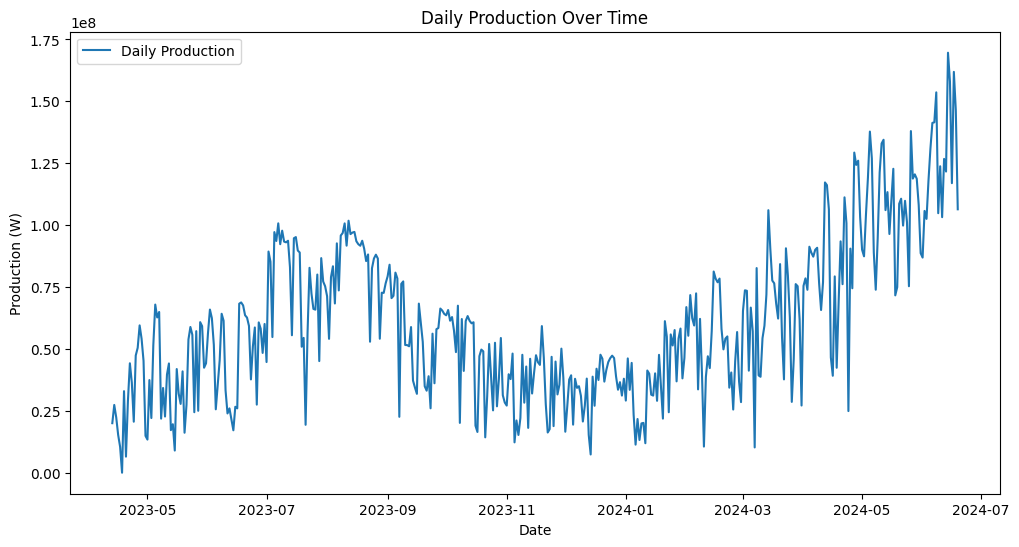

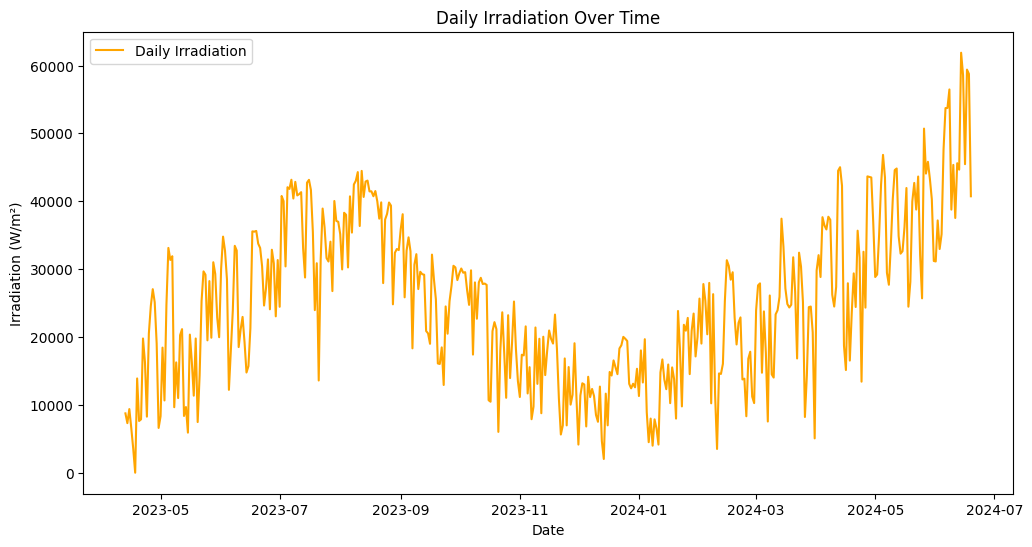

In [21]:
import matplotlib.pyplot as plt

# Plot daily production
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Prd'], label='Daily Production')
plt.title('Daily Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production (W)')
plt.legend()
plt.show()

# Plot daily irradiation
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Irr'], label='Daily Irradiation', color='orange')
plt.title('Daily Irradiation Over Time')
plt.xlabel('Date')
plt.ylabel('Irradiation (W/m²)')
plt.legend()
plt.show()


This code creates cyclical features from the timestamp index of the DataFrame, allowing for the modeling of seasonal patterns in time series data. By transforming time-related features using sine and cosine functions, it retains the cyclical nature of hours, days, months, and days of the week.

### Feature Creation
- **Extracting Time Components**: The following features are extracted from the DataFrame's index:
  - `hour`: Extracted from the index to represent the hour of the day.
  - `day`: Extracted to represent the day of the month.
  - `month`: Extracted to represent the month of the year.
  - `dayofweek`: Extracted to represent the day of the week (0=Monday, 6=Sunday).

### Feature Transformation
- **Sine and Cosine Transformation**: The extracted features are transformed using sine and cosine functions to capture their cyclical nature:
  - `hour_sin` and `hour_cos`: Represent the cyclical nature of hours in a day.
  - `day_sin` and `day_cos`: Represent the cyclical nature of days in a month.
  - `month_sin` and `month_cos`: Represent the cyclical nature of months in a year.
  - `dayofweek_sin` and `dayofweek_cos`: Represent the cyclical nature of days in a week.

### Dropping Original Columns
- The original time-related columns (`hour`, `day`, `month`, `dayofweek`) are dropped from the DataFrame to retain only the transformed cyclical features.


In [22]:
import numpy as np

# Creating cyclical features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

# Transforming the features using sine and cosine
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

# Dropping the original columns used for transformation
df.drop(columns=['hour', 'day', 'month', 'dayofweek'], inplace=True)


# Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df[['Irr', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos']]
y = df['PrdNorm']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
X_train.shape

(44805, 9)

In [25]:
y_train.shape

(44805,)

In [26]:
df

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2023-04-13 11:00:00+00:00,Bisceglie,780930.530000,0.791461,917.055833,2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 12:00:00+00:00,Bisceglie,743441.672500,0.753484,872.392333,1.224647e-16,-1.000000,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 13:00:00+00:00,Bisceglie,578979.020833,0.586780,670.299333,-2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 14:00:00+00:00,Bisceglie,415189.573333,0.420821,478.413500,-5.000000e-01,-0.866025,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 15:00:00+00:00,Bisceglie,530802.923333,0.537957,605.063667,-7.071068e-01,-0.707107,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 19:00:00+00:00,Celso,27114.732500,0.004520,5.538500,-9.659258e-01,0.258819,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 20:00:00+00:00,Celso,0.000000,0.000000,0.338333,-8.660254e-01,0.500000,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 21:00:00+00:00,Celso,0.000000,0.000000,0.320833,-7.071068e-01,0.707107,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


In [27]:
df.loc['2024-06-19 23:00:00+00:00']

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2024-06-19 23:00:00+00:00,Bisceglie,0.0,0.0,0.016833,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Modica,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Ortona,0.0,0.0,0.541000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,SanCristoforo,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,MolinoCasilloTT,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Celso,0.0,0.0,0.294500,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


# Importing Libraries for Model Evaluation

In [28]:
from sklearn.metrics import mean_absolute_error
import numpy as np


# Defining the Mean Absolute Percentage Error Function

In [29]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Random Forest Regression Model

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)

index = y_test>0.2

mape_rf = mean_absolute_percentage_error(y_test[index], y_pred_rf[index])
print(f"Random Forest - MAE: {mae_rf}, MAPE: {mape_rf}")

print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")


Random Forest - MAE: 0.008419122559803063, MAPE: 5.251368852770586
Random Forest - RMSE: 0.019134144225154307, R²: 0.993951071381657


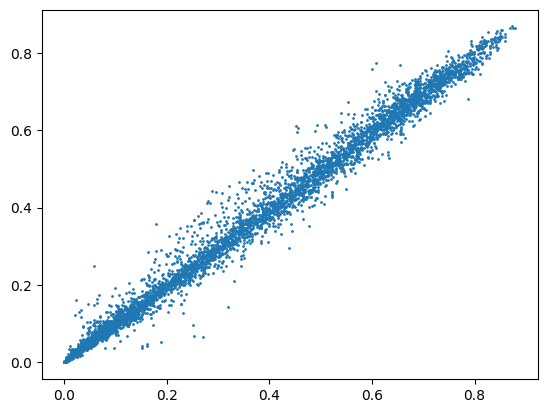

In [31]:
import matplotlib.pyplot as plt
 
 
plt.scatter(y_test, y_pred_rf, s=1)
 
plt.show()

In [32]:
y_pred_rf.max()

0.8678254219227065

# Rotational Forest Regression Model

In [33]:
pip install scikit-plot


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [35]:
# Define a function for Rotational Forest Regressor
class RotationalForestRegressor:
    def __init__(self, n_estimators=100, random_state=None):
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Create a random permutation of features
            permuted_indices = np.random.permutation(X.shape[1])
            model = RandomForestRegressor(random_state=self.random_state)
            model.fit(X[:, permuted_indices], y)
            self.models.append((model, permuted_indices))

    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.n_estimators))
        for i, (model, indices) in enumerate(self.models):
            predictions[:, i] = model.predict(X[:, indices])
        return np.mean(predictions, axis=1)

In [42]:
# Initialize the Rotational Forest Regressor
rot_rf_model = RotationalForestRegressor(n_estimators=10, random_state=42)

In [43]:
# Train the model
rot_rf_model.fit(X_train.to_numpy(), y_train.to_numpy())

In [47]:
# Predictions
y_pred_rot_rf = rot_rf_model.predict(X_test.to_numpy())

# Evaluation
mse_rot_rf = mean_squared_error(y_test, y_pred_rot_rf)
rmse_rot_rf = np.sqrt(mse_rot_rf)
r2_rot_rf = r2_score(y_test, y_pred_rot_rf)
mae_rot_rf = mean_absolute_error(y_test, y_pred_rot_rf)

print(f"Rotational Forest - MAE: {mae_rot_rf}, RMSE: {rmse_rot_rf}, R²: {r2_rot_rf}")


Rotational Forest - MAE: 0.008415800840207734, RMSE: 0.019130774484993115, R²: 0.9939532017641387


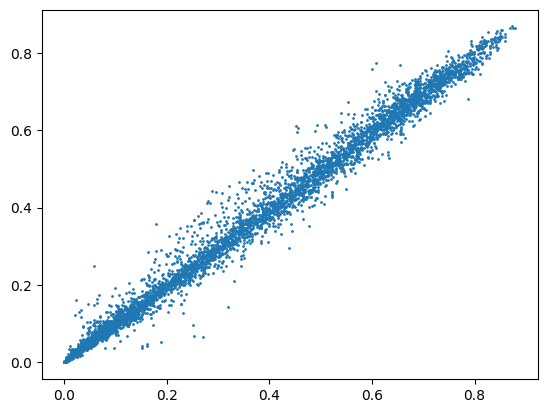

In [49]:
import matplotlib.pyplot as plt
 
 
plt.scatter(y_test, y_pred_rf, s=1)
 
plt.show()

# XGBoost Regression Model

In [50]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)


# XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"XGBoost - MAE: {mae_xgb}, MAPE: {mape_xgb}")

print(f"XGBoost - RMSE: {rmse_xgb}, R²: {r2_xgb}")


XGBoost - MAE: 0.008378877107163696, MAPE: inf
XGBoost - RMSE: 0.018435691454507883, R²: 0.994384618908613


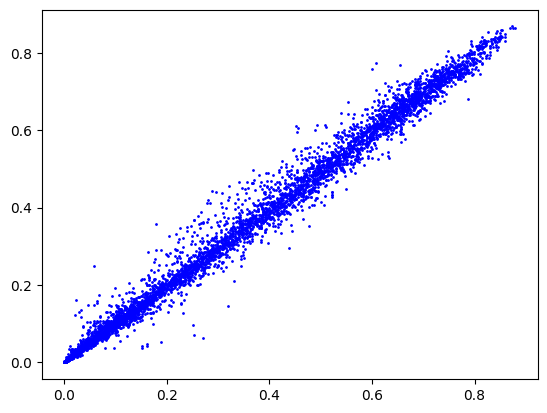

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rot_rf, s=1, color='blue', label='Rotational Forest Predictions')

plt.show()

 

# Support Vector Regressor (SVR) Model

In [53]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)

# Support Vector Regressor
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
print(f"SVR - MAE: {mae_svr}, MAPE: {mape_svr}")

print(f"SVR - RMSE: {rmse_svr}, R²: {r2_svr}")


SVR - MAE: 0.07396383233621392, MAPE: inf
SVR - RMSE: 0.08008882340109325, R²: 0.8940248109348855


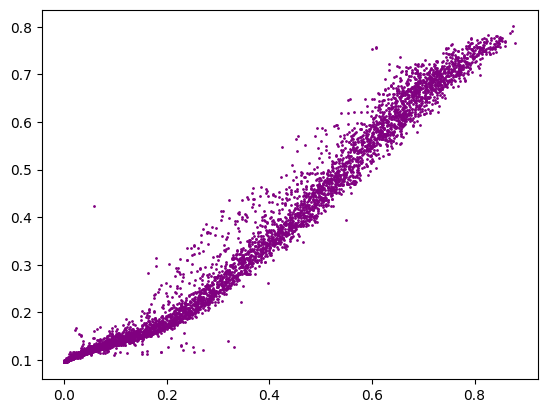

In [54]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_svr, s=1, color='purple', label='SVR Predictions')

plt.show()


# Standard Neural Network (SNN) Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
snn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
snn_model.compile(optimizer='adam', loss='mse')

# Train the model
snn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_snn = snn_model.predict(X_test).flatten()

# Evaluation
mse_snn = mean_squared_error(y_test, y_pred_snn)
rmse_snn = mse_snn ** 0.5
r2_snn = r2_score(y_test, y_pred_snn)

# Standard Neural Network
mae_snn = mean_absolute_error(y_test, y_pred_snn)
mape_snn = mean_absolute_percentage_error(y_test, y_pred_snn)
print(f"SNN - MAE: {mae_snn}, MAPE: {mape_snn}")


print(f"SNN - RMSE: {rmse_snn}, R²: {r2_snn}")


/Users/shilpasrinivasareddy/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/50
1121/1121 [==============================] - 1s 624us/step - loss: 1.4886 - val_loss: 0.0019
Epoch 2/50
1121/1121 [==============================] - 1s 532us/step - loss: 0.0050 - val_loss: 0.0090
Epoch 3/50
1121/1121 [==============================] - 1s 526us/step - loss: 0.0799 - val_loss: 0.0036
Epoch 4/50
1121/1121 [==============================] - 1s 532us/step - loss: 0.1859 - val_loss: 0.0072
Epoch 5/50
1121/1121 [==============================] - 1s 573us/step - loss: 0.0973 - val_loss: 0.0215
Epoch 6/50
1121/1121 [==============================] - 1s 539us/step - loss: 0.1816 - val_loss: 0.0071
Epoch 7/50
1121/1121 [==============================] - 1s 574us/step - loss: 0.0455 - val_loss: 0.2634
Epoch 8/50
1121/1121 [==============================] - 1s 634us/step - loss: 0.0410 - val_loss: 5.5753e-04
Epoch 9/50
1121/1121 [==============================] - 1s 592us/step - loss: 0.2120 - val_loss: 0.0012
Epoch 10/50
1121/1121 [==============================] - 1s 

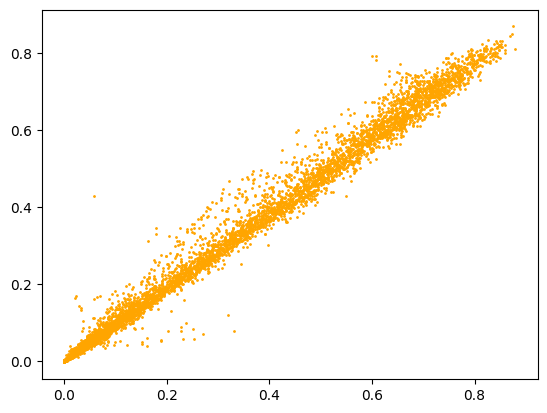

In [57]:

plt.scatter(y_test, y_pred_snn, s=1, color='orange', label='SNN Predictions')
plt.show()

# RNN

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [66]:
# Load the dataset
df = pd.read_csv('Thesisdataset.csv', parse_dates=['UTC'], date_format='%Y-%m-%d %H:%M:%S%z')

# Set 'UTC' as the index
df.set_index('UTC', inplace=True)


In [67]:
# Get unique plant IDs
plant_ids = df['pID'].unique()


In [68]:
# Function to create dataset for RNN
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


Training RNN for Plant ID: Bisceglie
Epoch 1/50
260/260 [==============================] - 4s 10ms/step - loss: 0.0299
Epoch 2/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0175
Epoch 3/50
260/260 [==============================] - 3s 10ms/step - loss: 0.0136
Epoch 4/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0111
Epoch 5/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0097
Epoch 6/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0086
Epoch 7/50
260/260 [==============================] - 2s 8ms/step - loss: 0.0082
Epoch 8/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0076
Epoch 9/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0072
Epoch 10/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0069
Epoch 11/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0067
Epoch 12/50
260/260 [==============================] - 3s 10ms/step 

/var/folders/jt/kyx6hq5j06xckkk40t7gff180000gn/T/ipykernel_96365/2087428630.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


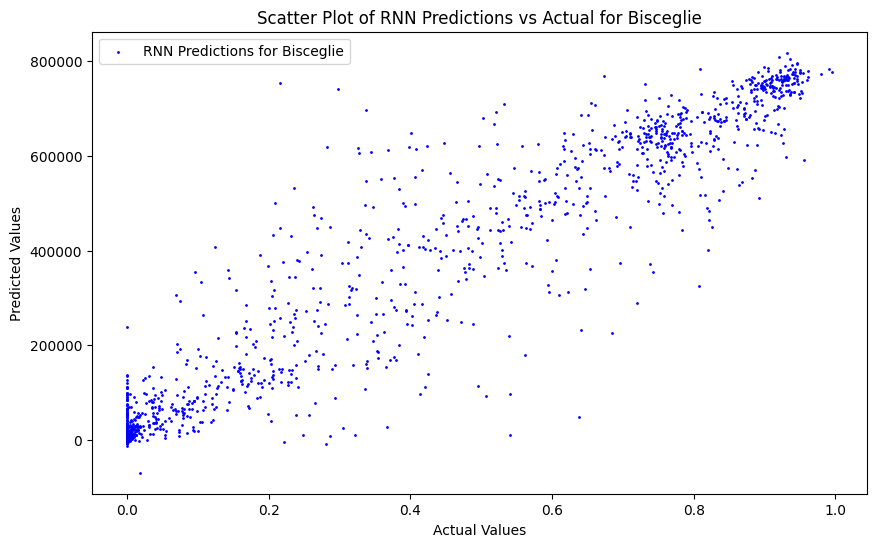

Training RNN for Plant ID: Modica
Epoch 1/50
249/249 [==============================] - 4s 9ms/step - loss: 0.0251
Epoch 2/50
249/249 [==============================] - 2s 10ms/step - loss: 0.0115
Epoch 3/50
249/249 [==============================] - 2s 9ms/step - loss: 0.0091
Epoch 4/50
249/249 [==============================] - 2s 9ms/step - loss: 0.0077
Epoch 5/50
249/249 [==============================] - 2s 9ms/step - loss: 0.0068
Epoch 6/50
249/249 [==============================] - 2s 9ms/step - loss: 0.0062
Epoch 7/50
249/249 [==============================] - 2s 9ms/step - loss: 0.0057
Epoch 8/50
249/249 [==============================] - 2s 9ms/step - loss: 0.0055
Epoch 9/50
249/249 [==============================] - 2s 9ms/step - loss: 0.0050
Epoch 10/50
249/249 [==============================] - 2s 9ms/step - loss: 0.0051
Epoch 11/50
249/249 [==============================] - 2s 9ms/step - loss: 0.0049
Epoch 12/50
249/249 [==============================] - 2s 9ms/step - los

/var/folders/jt/kyx6hq5j06xckkk40t7gff180000gn/T/ipykernel_96365/2087428630.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


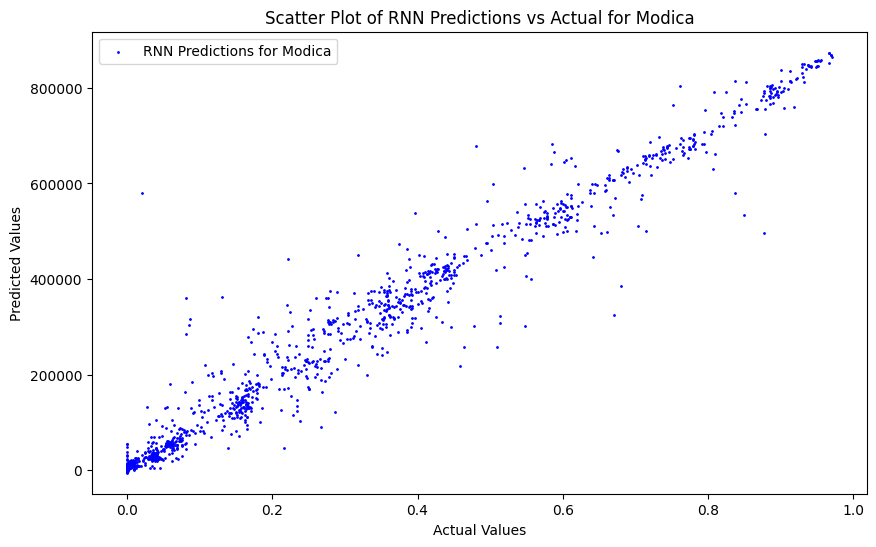

Training RNN for Plant ID: Ortona
Epoch 1/50
260/260 [==============================] - 4s 10ms/step - loss: 0.0195
Epoch 2/50
260/260 [==============================] - 3s 10ms/step - loss: 0.0096
Epoch 3/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0081
Epoch 4/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0066
Epoch 5/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0058
Epoch 6/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0053
Epoch 7/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0049
Epoch 8/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0047
Epoch 9/50
260/260 [==============================] - 2s 10ms/step - loss: 0.0045
Epoch 10/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0045
Epoch 11/50
260/260 [==============================] - 3s 10ms/step - loss: 0.0043
Epoch 12/50
260/260 [==============================] - 3s 10ms/step -

/var/folders/jt/kyx6hq5j06xckkk40t7gff180000gn/T/ipykernel_96365/2087428630.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


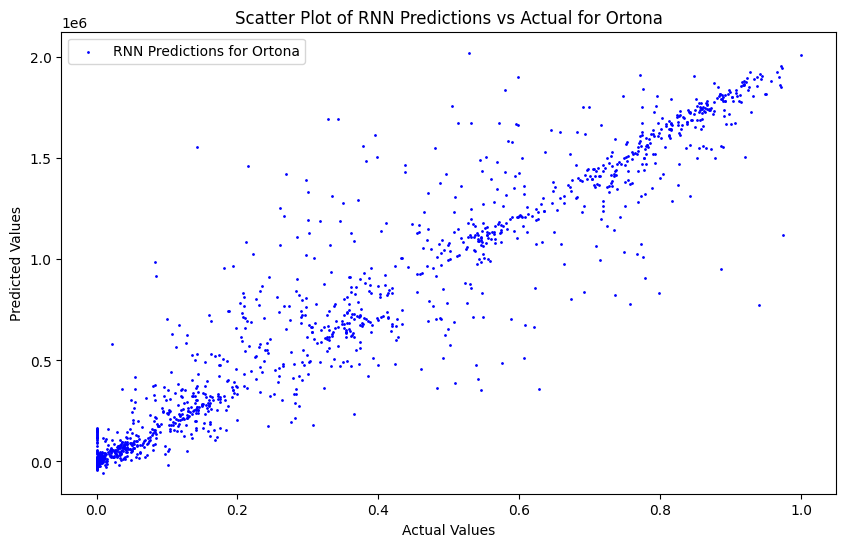

Training RNN for Plant ID: SanCristoforo
Epoch 1/50
231/231 [==============================] - 3s 9ms/step - loss: 0.0238
Epoch 2/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0140
Epoch 3/50
231/231 [==============================] - 2s 10ms/step - loss: 0.0110
Epoch 4/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0085
Epoch 5/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0076
Epoch 6/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0070
Epoch 7/50
231/231 [==============================] - 2s 10ms/step - loss: 0.0066
Epoch 8/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0065
Epoch 9/50
231/231 [==============================] - 2s 10ms/step - loss: 0.0062
Epoch 10/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0059
Epoch 11/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0055
Epoch 12/50
231/231 [==============================] - 2s 9ms/s

/var/folders/jt/kyx6hq5j06xckkk40t7gff180000gn/T/ipykernel_96365/2087428630.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


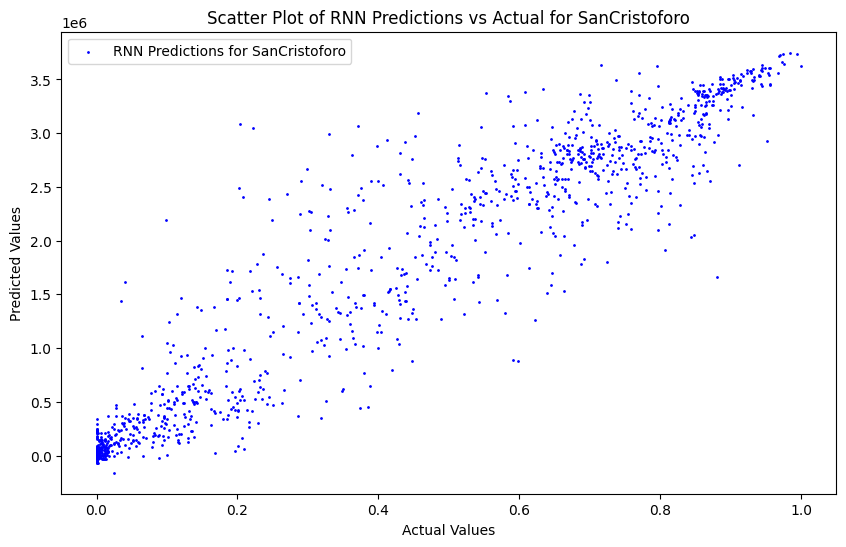

Training RNN for Plant ID: MolinoCasilloTT
Epoch 1/50
260/260 [==============================] - 4s 9ms/step - loss: 0.0312
Epoch 2/50
260/260 [==============================] - 2s 10ms/step - loss: 0.0183
Epoch 3/50
260/260 [==============================] - 2s 10ms/step - loss: 0.0142
Epoch 4/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0113
Epoch 5/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0104
Epoch 6/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0096
Epoch 7/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0091
Epoch 8/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0083
Epoch 9/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0081
Epoch 10/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0076
Epoch 11/50
260/260 [==============================] - 2s 9ms/step - loss: 0.0075
Epoch 12/50
260/260 [==============================] - 2s 9ms/

/var/folders/jt/kyx6hq5j06xckkk40t7gff180000gn/T/ipykernel_96365/2087428630.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


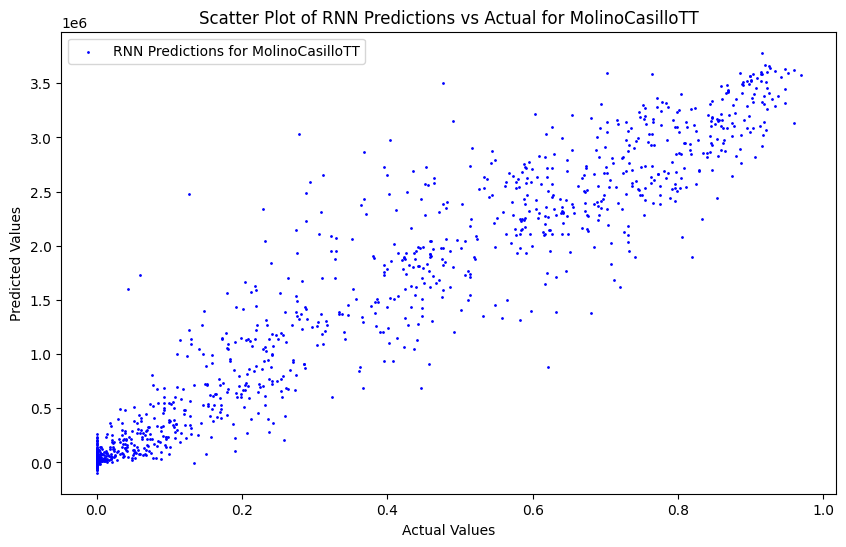

Training RNN for Plant ID: Celso
Epoch 1/50
139/139 [==============================] - 2s 9ms/step - loss: 0.0254
Epoch 2/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0131
Epoch 3/50
139/139 [==============================] - 1s 10ms/step - loss: 0.0120
Epoch 4/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 5/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0102
Epoch 6/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0086
Epoch 7/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0080
Epoch 8/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 9/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0072
Epoch 10/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0068
Epoch 11/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0065
Epoch 12/50
139/139 [==============================] - 1s 9ms/step - loss

/var/folders/jt/kyx6hq5j06xckkk40t7gff180000gn/T/ipykernel_96365/2087428630.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


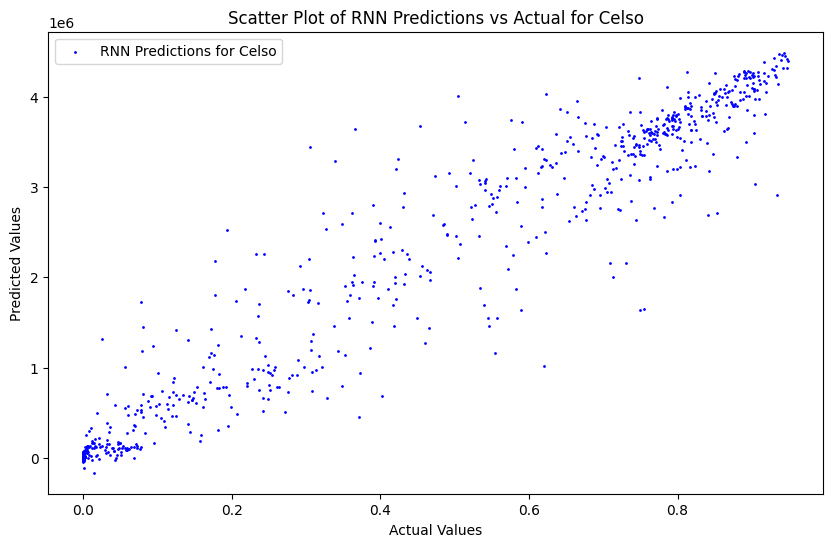

In [77]:
# Iterate through each plant ID
for plant_id in plant_ids:
    print(f"Training RNN for Plant ID: {plant_id}")
    
    # Select data for the current plant
    plant_data = df[df['pID'] == plant_id]

    # Check if there's data for the plant
    if plant_data.empty:
        print(f"No data found for Plant ID: {plant_id}. Skipping...")
        continue

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(plant_data[['Prd']])

    # Set time step for sequences (e.g., using the last 24 hours)
    time_step = 24
    X, y = create_dataset(scaled_data, time_step)

    # Check if there's enough data for training
    if len(X) == 0:
        print(f"Not enough data to create dataset for Plant ID: {plant_id}. Skipping...")
        continue

    # Reshape the input to be [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split the data into training and testing sets (e.g., 80% train, 20% test)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Initialize the RNN model
    rnn_model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])

    # Compile the model
    rnn_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Predictions
    y_pred_rnn = rnn_model.predict(X_test)

    # Inverse scaling to get actual values
    y_pred_rnn_inverse = scaler.inverse_transform(y_pred_rnn)

    # Evaluation
    mse_rnn = mean_squared_error(y_test, y_pred_rnn_inverse)
    rmse_rnn = mse_rnn ** 0.5
    r2_rnn = r2_score(y_test, y_pred_rnn_inverse)

    # RNN Results
    mae_rnn = mean_absolute_error(y_test, y_pred_rnn_inverse)
    mape_rnn = mean_absolute_percentage_error(y_test, y_pred_rnn_inverse)
    print(f"RNN for {plant_id} - MAE: {mae_rnn}, MAPE: {mape_rnn}")
    print(f"RNN for {plant_id} - RMSE: {rmse_rnn}, R²: {r2_rnn}")
    print("-" * 50)

    # Scatter plot for RNN predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_rnn_inverse, s=1, color='blue', label=f'RNN Predictions for {plant_id}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of RNN Predictions vs Actual for {plant_id}')
    plt.legend()
    plt.show()


# Transformer Model

In [78]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Add, Dropout, Reshape
from tensorflow.keras.models import Model

# Load the dataset
df = pd.read_csv('Thesisdataset.csv', parse_dates=['UTC'], date_format='%Y-%m-%d %H:%M:%S%z')

# Function to create sequences for time series
def create_sequences(data, time_step=24):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Define the Transformer model
def create_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # Transformer Encoder Layer
    x = Dense(64, activation='relu')(inputs)
    x = Reshape((x.shape[1], 1))(x)  # Reshape to 3D for attention
    x = Dropout(0.1)(x)
    
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = Add()([x, attention_output])  # Residual Connection
    x = LayerNormalization()(x)

    # Flatten and Dense layers
    x = tf.reshape(x, (tf.shape(x)[0], tf.shape(x)[1] * tf.shape(x)[2]))  # Flattening
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.1)(x)
    
    # Output Layer
    outputs = Dense(1)(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Iterate through each plant ID
plant_ids = df['pID'].unique()
for plant_id in plant_ids:
    print(f"Training Transformer for Plant ID: {plant_id}")
    
    # Select data for the current plant
    plant_data = df[df['pID'] == plant_id]

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(plant_data[['Prd']].values)

    # Create sequences
    time_step = 24  # Define your time step
    X, y = create_sequences(scaled_data, time_step)

    # Split the data into training and testing sets (80% train, 20% test)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Reshape input for the model (3D shape)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])  # Keep as 2D for Dense layers
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

    # Create the Transformer model
    transformer_model = create_transformer_model((X_train.shape[1],))
    
    # Train the model
    transformer_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Predictions
    y_pred_transformer = transformer_model.predict(X_test)

    # Inverse scaling to get actual values
    y_pred_transformer_inverse = scaler.inverse_transform(y_pred_transformer)

    # Evaluation
    mse_transformer = mean_squared_error(y_test, y_pred_transformer_inverse)
    rmse_transformer = mse_transformer ** 0.5
    r2_transformer = r2_score(y_test, y_pred_transformer_inverse)

    # Transformer Results
    mae_transformer = mean_absolute_error(y_test, y_pred_transformer_inverse)
    print(f"Transformer for {plant_id} - MAE: {mae_transformer}, RMSE: {rmse_transformer}, R²: {r2_transformer}")
    print("-" * 50)


Training Transformer for Plant ID: Bisceglie
Epoch 1/50
208/208 [==============================] - 3s 13ms/step - loss: 0.1092 - val_loss: 0.0516
Epoch 2/50
208/208 [==============================] - 3s 12ms/step - loss: 0.0909 - val_loss: 0.0558
Epoch 3/50
208/208 [==============================] - 3s 12ms/step - loss: 0.0896 - val_loss: 0.0578
Epoch 4/50
208/208 [==============================] - 3s 12ms/step - loss: 0.0896 - val_loss: 0.0581
Epoch 5/50
208/208 [==============================] - 3s 13ms/step - loss: 0.0896 - val_loss: 0.0573
Epoch 6/50
208/208 [==============================] - 3s 12ms/step - loss: 0.0896 - val_loss: 0.0570
Epoch 7/50
208/208 [==============================] - 3s 12ms/step - loss: 0.0896 - val_loss: 0.0572
Epoch 8/50
208/208 [==============================] - 3s 12ms/step - loss: 0.0896 - val_loss: 0.0574
Epoch 9/50
208/208 [==============================] - 3s 12ms/step - loss: 0.0895 - val_loss: 0.0583
Epoch 10/50
208/208 [=========================

In [80]:
# Preprocess the Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Function to create sequences for the Transformer
def create_sequences(data, time_step=24):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Normalize and create sequences
for plant_id in plant_ids:
    print(f"Preparing data for Plant ID: {plant_id}")
    plant_data = df[df['pID'] == plant_id]

    if plant_data.empty:
        print(f"No data found for Plant ID: {plant_id}. Skipping...")
        continue

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(plant_data[['Prd']])
    X, y = create_sequences(scaled_data)

    # Split into train and test sets
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Reshape for the Transformer
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


Preparing data for Plant ID: Bisceglie
Preparing data for Plant ID: Modica
Preparing data for Plant ID: Ortona
Preparing data for Plant ID: SanCristoforo
Preparing data for Plant ID: MolinoCasilloTT
Preparing data for Plant ID: Celso


In [83]:
# Create the Transformer Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.layers import MultiHeadAttention, GlobalAveragePooling1D

# Transformer block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs  # Residual connection

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    return x + res  # Residual connection

# Define the Transformer model
def build_transformer(input_shape):
    inputs = Input(shape=input_shape)
    x = inputs

    # Create multiple transformer encoder blocks
    for _ in range(2):  # Number of Transformer blocks
        x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=256, dropout=0.1)

    x = GlobalAveragePooling1D(data_format="channels_first")(x)
    x = Dense(20, activation="relu")(x)
    outputs = Dense(1)(x)

    return Model(inputs, outputs)

# Build and compile the model
transformer_model = build_transformer(input_shape=(X_train.shape[1], 1))
transformer_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
transformer_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
111/111 [==============================] - 6s 45ms/step - loss: 0.0244 - val_loss: 0.0206
Epoch 2/50
111/111 [==============================] - 5s 49ms/step - loss: 0.0092 - val_loss: 0.0154
Epoch 3/50
111/111 [==============================] - 5s 44ms/step - loss: 0.0072 - val_loss: 0.0128
Epoch 4/50
111/111 [==============================] - 5s 49ms/step - loss: 0.0062 - val_loss: 0.0119
Epoch 5/50
111/111 [==============================] - 5s 47ms/step - loss: 0.0056 - val_loss: 0.0107
Epoch 6/50
111/111 [==============================] - 5s 46ms/step - loss: 0.0053 - val_loss: 0.0114
Epoch 7/50
111/111 [==============================] - 5s 46ms/step - loss: 0.0050 - val_loss: 0.0105
Epoch 8/50
111/111 [==============================] - 5s 44ms/step - loss: 0.0049 - val_loss: 0.0106
Epoch 9/50
111/111 [==============================] - 5s 45ms/step - loss: 0.0048 - val_loss: 0.0116
Epoch 10/50
111/111 [==============================] - 5s 46ms/step - loss: 0.0046 - val_lo

In [84]:
# Make Predictions and Evaluate
# Predictions
y_pred_transformer = transformer_model.predict(X_test)

# Inverse scaling to get actual values
y_pred_transformer_inverse = scaler.inverse_transform(y_pred_transformer)

# Evaluation
mse_transformer = mean_squared_error(y_test, y_pred_transformer_inverse)
rmse_transformer = mse_transformer ** 0.5
r2_transformer = r2_score(y_test, y_pred_transformer_inverse)

# Transformer Results
mae_transformer = mean_absolute_error(y_test, y_pred_transformer_inverse)
mape_transformer = mean_absolute_percentage_error(y_test, y_pred_transformer_inverse)
print(f"Transformer for {plant_id} - MAE: {mae_transformer}, MAPE: {mape_transformer}")
print(f"Transformer for {plant_id} - RMSE: {rmse_transformer}, R²: {r2_transformer}")


35/35 [==============================] - 1s 19ms/step
Transformer for Celso - MAE: 1542773.9838936764, MAPE: inf
Transformer for Celso - RMSE: 2310107.963259699, R²: -43784088871414.58


/var/folders/jt/kyx6hq5j06xckkk40t7gff180000gn/T/ipykernel_96365/2087428630.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


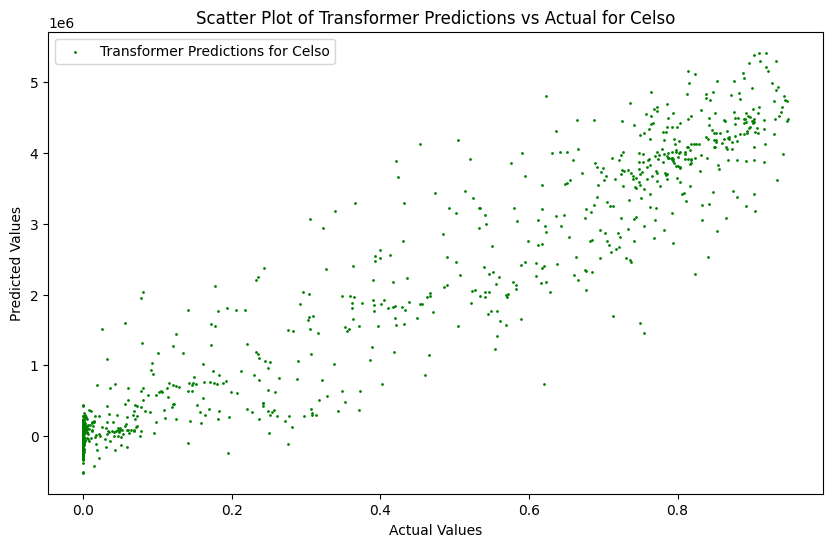

In [85]:
# Scatter plot for Transformer predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_transformer_inverse, s=1, color='green', label=f'Transformer Predictions for {plant_id}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Scatter Plot of Transformer Predictions vs Actual for {plant_id}')
plt.legend()
plt.show()
